In [1]:
import pandas as pd
import sys
import argparse
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import os
import numpy as np
import glob
import traceback
import re
from pathlib import Path

In [2]:
all_events_path = r"D:\Box Sync\Box Sync\00_BEAR_Lab\Projects\Kyler(Kihun) Hong\1st_Haptic Sleeve\PilotExperiment\MotorLearning\20251202_SNFH06_Session1\SNHF06_Session1_events.csv"
events_df = pd.read_csv(all_events_path)

def trial_timestamps(df, trial_col="trial", event_col="event", time_col="ros_time"):
    out = []

    for trial, g in df.groupby(trial_col, sort=False):
        g = g.sort_values(time_col)

        share_times = g.loc[g[event_col] == "share_button", time_col]
        rec_times   = g.loc[g[event_col] == "start_recording", time_col]
        sq_times    = g.loc[g[event_col] == "square_button", time_col]

        # start: prefer share_button, else start_recording
        if len(share_times) > 0:
            start_time = share_times.iloc[0]
        elif len(rec_times) > 0:
            start_time = rec_times.iloc[0]
        else:
            start_time = pd.NA

        # end: take the LAST square_button after start_time (fallback: last square_button)
        if len(sq_times) == 0:
            end_time = pd.NA
        else:
            if pd.isna(start_time):
                end_time = sq_times.iloc[-1]
            else:
                after = sq_times[sq_times >= start_time]
                end_time = after.iloc[-1] if len(after) > 0 else sq_times.iloc[-1]

        out.append({trial_col: trial, "start_time": start_time, "end_time": end_time})

    return pd.DataFrame(out)

# Example usage (edit trial_col if yours is "trial_number" etc.)
ts = trial_timestamps(events_df, trial_col="trial")
print(ts.to_string(index=False, float_format=lambda x: f"{x:.6f}"))

# If you want to append these times onto every row in events_df:
events_df_with_times = events_df.merge(ts, on="trial", how="left")


 trial        start_time          end_time
     0 1764694205.994672 1764694460.634227
     1 1764694490.434961 1764694627.881043
     2 1764694765.979226 1764695012.803000
     3 1764695036.439461 1764695226.870298
     4 1764695253.090887              <NA>
     5 1764695368.565682 1764695571.898882
     6 1764695599.007145 1764695856.291564
     7 1764695890.860445 1764696035.780971
     8 1764696067.981101              <NA>
     9 1764696149.357975 1764696331.611730
    10 1764696354.063863 1764696488.717341
    11 1764696511.521420 1764696627.471050
    12 1764696646.382939 1764696773.932379
    13 1764696794.245437 1764696908.762048
    14 1764696929.466698 1764697014.395440
    15 1764697037.760031 1764697152.169045
    16 1764697178.837310 1764697305.427010
    17 1764697335.399118 1764697437.188038
    18 1764697458.408064 1764697565.896848
    19 1764697585.288554 1764697683.297583
    20 1764697708.657534 1764697837.322418
    21 1764697859.846613 1764697945.431386
    22 1764

In [3]:
all_events_path2 = r"D:\Box Sync\Box Sync\00_BEAR_Lab\Projects\Kyler(Kihun) Hong\1st_Haptic Sleeve\PilotExperiment\MotorLearning\20251203_SNFH06_Session2\SNHF06_Session2_events.csv"
events_df2 = pd.read_csv(all_events_path2)

def trial_timestamps(df, trial_col="trial", event_col="event", time_col="ros_time"):
    out = []

    for trial, g in df.groupby(trial_col, sort=False):
        g = g.sort_values(time_col)

        share_times = g.loc[g[event_col] == "share_button", time_col]
        rec_times   = g.loc[g[event_col] == "start_recording", time_col]
        sq_times    = g.loc[g[event_col] == "square_button", time_col]

        # start: prefer share_button, else start_recording
        if len(share_times) > 0:
            start_time = share_times.iloc[0]
        elif len(rec_times) > 0:
            start_time = rec_times.iloc[0]
        else:
            start_time = pd.NA

        # end: take the LAST square_button after start_time (fallback: last square_button)
        if len(sq_times) == 0:
            end_time = pd.NA
        else:
            if pd.isna(start_time):
                end_time = sq_times.iloc[-1]
            else:
                after = sq_times[sq_times >= start_time]
                end_time = after.iloc[-1] if len(after) > 0 else sq_times.iloc[-1]

        out.append({trial_col: trial, "start_time": start_time, "end_time": end_time})
    
    return pd.DataFrame(out)

# Example usage (edit trial_col if yours is "trial_number" etc.)
ts2 = trial_timestamps(events_df2, trial_col="trial")
print(ts2.to_string(index=False, float_format=lambda x: f"{x:.6f}"))

# If you want to append these times onto every row in events_df:
events_df_with_times2 = events_df2.merge(ts2, on="trial", how="left")


 trial        start_time          end_time
     0 1764804733.073565 1764804843.874730
     1 1764804863.762831 1764804948.515340
     2 1764804966.291572 1764805058.147668
     3 1764805072.455640 1764805154.928007
     4 1764805169.827641 1764805235.851736
     5 1764805251.735587 1764805321.231967
     6 1764805340.203955 1764805433.892656
     7 1764805452.572479 1764805524.705022
     8 1764805540.161416 1764805604.985277
     9 1764805623.229338 1764805703.814329
    10 1764805717.506269 1764805810.434783
    11 1764805834.459120 1764805896.747566
    12 1764805913.591640 1764805974.872119
    13 1764805988.480088 1764806041.672624
    14 1764806055.600645 1764806110.213224
    15 1764806295.398871 1764806358.647360
    16 1764806373.231347 1764806436.312166
    17 1764806449.912303 1764806549.541283
    18 1764806562.737804 1764806631.301792
    19 1764806661.986095 1764806719.722698
    20 1764806733.342667 1764806804.867546
    21 1764806819.087599 1764806872.064030
    22 1764

In [4]:
all_events_path3 = r"D:\Box Sync\Box Sync\00_BEAR_Lab\Projects\Kyler(Kihun) Hong\1st_Haptic Sleeve\PilotExperiment\MotorLearning\20251209_SNFH06_Session3\snhf06_Session3_events.csv"
events_df3 = pd.read_csv(all_events_path3)

def trial_timestamps(df, trial_col="trial", event_col="event", time_col="ros_time"):
    out = []

    for trial, g in df.groupby(trial_col, sort=False):
        g = g.sort_values(time_col)

        share_times = g.loc[g[event_col] == "share_button", time_col]
        rec_times   = g.loc[g[event_col] == "start_recording", time_col]
        sq_times    = g.loc[g[event_col] == "square_button", time_col]

        # start: prefer share_button, else start_recording
        if len(share_times) > 0:
            start_time = share_times.iloc[0]
        elif len(rec_times) > 0:
            start_time = rec_times.iloc[0]
        else:
            start_time = pd.NA

        # end: take the LAST square_button after start_time (fallback: last square_button)
        if len(sq_times) == 0:
            end_time = pd.NA
        else:
            if pd.isna(start_time):
                end_time = sq_times.iloc[-1]
            else:
                after = sq_times[sq_times >= start_time]
                end_time = after.iloc[-1] if len(after) > 0 else sq_times.iloc[-1]

        out.append({trial_col: trial, "start_time": start_time, "end_time": end_time})

    return pd.DataFrame(out)

# Example usage (edit trial_col if yours is "trial_number" etc.)
ts3 = trial_timestamps(events_df3, trial_col="trial")
print(ts3.to_string(index=False, float_format=lambda x: f"{x:.6f}"))

# If you want to append these times onto every row in events_df:
events_df_with_times3 = events_df3.merge(ts3, on="trial", how="left")

 trial        start_time          end_time
     0 1765320777.095561 1765320890.632074
     1 1765320900.220213 1765320969.124265
     2 1765320977.672198 1765321052.761259
     3 1765321064.468831 1765321141.017996
     4 1765321148.813664 1765321215.538516
     5 1765321228.722651 1765321286.323244
     6 1765321299.751413 1765321360.752327
     7 1765321368.208509 1765321430.133203
     8 1765321446.605618 1765321502.930244
     9 1765321511.578408 1765321565.499137
    10 1765321573.611203 1765321621.652009
    11 1765321629.468104 1765321684.204635
    12 1765321691.380750 1765321745.189735
    13 1765321753.489706 1765321805.958284
    14 1765321814.050634 1765321867.759459
    15 1765322060.946222              <NA>
    16 1765322081.682953 1765322129.559711
    17 1765322138.055893 1765322189.075355
    18 1765322197.271009 1765322239.898874
    19 1765322248.838826 1765322294.130656
    20 1765322301.306568 1765322346.046433
    21 1765322356.906295 1765322408.122116
    22 1765

In [5]:
ROOT1 = Path(r"D:\Box Sync\Box Sync\00_BEAR_Lab\Projects\Kyler(Kihun) Hong\1st_Haptic Sleeve\PilotExperiment\MotorLearning\20251202_SNFH06_Session1\Rosbag")
TF_PARENT = ROOT1 / "SNHF06_Session1_000_tf"  # just to get the naming pattern
TF_GLOB = "SNHF06_Session1_*_tf"             # matches 000_tf, 001_tf, ...

TOPIC_SUBSTRINGS = [
    "vx300s-commands-joy_processed",
    "vx300s-gripper_pos",
    "vx300s-geppier_vel",   # your spelling
    "vx300s-gripper_vel",   # common spelling (in case)
]

TRIAL_IS_ONE_BASED = True

def pick_time_col(df: pd.DataFrame):
    """Try common time columns from bag conversions."""
    candidates = [
        "Time"
    ]
    for c in candidates:
        if c in df.columns:
            return c
    # last resort: any column containing 'time' or 'stamp'
    for c in df.columns:
        lc = c.lower()
        if "time" in lc or "stamp" in lc:
            return c
    raise ValueError(f"No time column found. Columns={list(df.columns)[:30]}...")

def find_topic_csvs(trial_folder: Path):
    """Return {substring: [csv_paths...]} for the substrings we care about."""
    csvs = list(trial_folder.glob("*.csv"))
    hits = {}
    for sub in TOPIC_SUBSTRINGS:
        matches = [p for p in csvs if sub in p.name]
        if matches:
            hits[sub] = matches
    return hits


def folder_index_from_name(folder: Path):
    # expects ..._000_tf
    m = re.search(r"_(\d{3})_tf$", folder.name)
    if not m:
        return None
    return int(m.group(1))

def segment_csv(in_path: Path, out_path: Path, start_time, end_time):
    df = pd.read_csv(in_path)
    tcol = pick_time_col(df)

    # Ensure numeric
    df[tcol] = pd.to_numeric(df[tcol], errors="coerce")

    seg = df[(df[tcol] >= start_time) & (df[tcol] <= end_time)].copy()
    # out_path.parent.mkdir(parents=True, exist_ok=True)
    # seg.to_csv(out_path, index=False)
    return len(seg), tcol


def segment_all_trials (ts: pd.DataFrame, root: Path): 
    trial_folders = sorted(root.glob(TF_GLOB))
    for folder in trial_folders:
        idx = folder_index_from_name(folder)
        if idx is None:
            print(f"Skipping folder with unexpected name: {folder}")
            continue
        trial_num = idx  if TRIAL_IS_ONE_BASED else idx
        row = ts.loc[ts['trial'] == trial_num]
        if row.empty: 
            print(f"No timestamp data for trial {trial_num}, skipping folder {folder}")
            continue
        start_time = row['start_time'].values[0]
        end_time = row['end_time'].values[0]    
        
        if pd.isna(start_time) or pd.isna(end_time):
            print(f"[WARN] Missing start/end for trial={trial_num} -> start={start_time}, end={end_time}")
            continue
        hits = find_topic_csvs(folder)
        if not hits:
            print(f"[WARN] No matching topic CSVs found in {folder.name}")
            continue

        out_dir = folder / "segmented"
        print(f"\nTrial {trial_num} ({folder.name}) start={start_time} end={end_time}")

        for sub, paths in hits.items():
            for p in paths:
                out_path = out_dir / p.name.replace(".csv", "_seg.csv")
                n, tcol = segment_csv(p, out_path, start_time, end_time)
                print(f"  - {p.name}  -> {out_path.name}  rows={n}  (time_col={tcol})")
segment_all_trials(ts, ROOT1)


Trial 0 (SNHF06_Session1_000_tf) start=1764694205.9946718 end=1764694460.6342273
  - vx300s-commands-joy_processed.csv  -> vx300s-commands-joy_processed_seg.csv  rows=25043  (time_col=Time)
  - vx300s-gripper_pos.csv  -> vx300s-gripper_pos_seg.csv  rows=2547  (time_col=Time)
  - vx300s-gripper_vel.csv  -> vx300s-gripper_vel_seg.csv  rows=2547  (time_col=Time)

Trial 1 (SNHF06_Session1_001_tf) start=1764694490.4349606 end=1764694627.8810432
  - vx300s-commands-joy_processed.csv  -> vx300s-commands-joy_processed_seg.csv  rows=12447  (time_col=Time)
  - vx300s-gripper_pos.csv  -> vx300s-gripper_pos_seg.csv  rows=1374  (time_col=Time)
  - vx300s-gripper_vel.csv  -> vx300s-gripper_vel_seg.csv  rows=1374  (time_col=Time)

Trial 2 (SNHF06_Session1_002_tf) start=1764694765.9792264 end=1764695012.803
  - vx300s-commands-joy_processed.csv  -> vx300s-commands-joy_processed_seg.csv  rows=22363  (time_col=Time)
  - vx300s-gripper_pos.csv  -> vx300s-gripper_pos_seg.csv  rows=2468  (time_col=Time)
 

In [16]:
ROOT2 = Path(r"D:\Box Sync\Box Sync\00_BEAR_Lab\Projects\Kyler(Kihun) Hong\1st_Haptic Sleeve\PilotExperiment\MotorLearning\20251203_SNFH06_Session2\Rosbag")
TF_PARENT = ROOT2 / "SNHF06_Session2_000_tf"  # just to get the naming pattern
TF_GLOB = "SNHF06_Session2_*_tf"             # matches 000_tf, 001_tf, ...

TOPIC_SUBSTRINGS = [
    "vx300s-commands-joy_processed",
    "vx300s-gripper_pos",
    "vx300s-geppier_vel",   # your spelling
    "vx300s-gripper_vel",   # common spelling (in case)
]

TRIAL_IS_ONE_BASED = True

def pick_time_col(df: pd.DataFrame):
    """Try common time columns from bag conversions."""
    candidates = [
        "Time"
    ]
    for c in candidates:
        if c in df.columns:
            return c
    # last resort: any column containing 'time' or 'stamp'
    for c in df.columns:
        lc = c.lower()
        if "time" in lc or "stamp" in lc:
            return c
    raise ValueError(f"No time column found. Columns={list(df.columns)[:30]}...")

def find_topic_csvs(trial_folder: Path):
    """Return {substring: [csv_paths...]} for the substrings we care about."""
    csvs = list(trial_folder.glob("*.csv"))
    hits = {}
    for sub in TOPIC_SUBSTRINGS:
        matches = [p for p in csvs if sub in p.name]
        if matches:
            hits[sub] = matches
    return hits


def folder_index_from_name(folder: Path):
    # expects ..._000_tf
    m = re.search(r"_(\d{3})_tf$", folder.name)
    if not m:
        return None
    return int(m.group(1))

def segment_csv(in_path: Path, out_path: Path, start_time, end_time):
    df = pd.read_csv(in_path)
    tcol = pick_time_col(df)

    # Ensure numeric
    df[tcol] = pd.to_numeric(df[tcol], errors="coerce")

    seg = df[(df[tcol] >= start_time) & (df[tcol] <= end_time)].copy()
    # out_path.parent.mkdir(parents=True, exist_ok=True)
    # seg.to_csv(out_path, index=False)
    return len(seg), tcol


def segment_all_trials (ts: pd.DataFrame, root: Path): 
    trial_folders = sorted(root.glob(TF_GLOB))
    for folder in trial_folders:
        idx = folder_index_from_name(folder)
        if idx is None:
            print(f"Skipping folder with unexpected name: {folder}")
            continue
        trial_num = idx  if TRIAL_IS_ONE_BASED else idx
        row = ts.loc[ts['trial'] == trial_num]
        if row.empty: 
            print(f"No timestamp data for trial {trial_num}, skipping folder {folder}")
            continue
        start_time = row['start_time'].values[0]
        end_time = row['end_time'].values[0]    
        
        if pd.isna(start_time) or pd.isna(end_time):
            print(f"[WARN] Missing start/end for trial={trial_num} -> start={start_time}, end={end_time}")
            continue
        hits = find_topic_csvs(folder)
        if not hits:
            print(f"[WARN] No matching topic CSVs found in {folder.name}")
            continue

        out_dir = folder / "segmented"
        print(f"\nTrial {trial_num} ({folder.name}) start={start_time} end={end_time}")

        for sub, paths in hits.items():
            for p in paths:
                out_path = out_dir / p.name.replace(".csv", "_seg.csv")
                n, tcol = segment_csv(p, out_path, start_time, end_time)
                print(f"  - {p.name}  -> {out_path.name}  rows={n}  (time_col={tcol})")
segment_all_trials(ts2, ROOT2)


Trial 0 (SNHF06_Session2_000_tf) start=1764804733.073565 end=1764804843.87473
  - vx300s-commands-joy_processed.csv  -> vx300s-commands-joy_processed_seg.csv  rows=11564  (time_col=Time)
  - vx300s-gripper_pos.csv  -> vx300s-gripper_pos_seg.csv  rows=1108  (time_col=Time)
  - vx300s-gripper_vel.csv  -> vx300s-gripper_vel_seg.csv  rows=1108  (time_col=Time)

Trial 1 (SNHF06_Session2_001_tf) start=1764804863.7628312 end=1764804948.51534
  - vx300s-commands-joy_processed.csv  -> vx300s-commands-joy_processed_seg.csv  rows=7926  (time_col=Time)
  - vx300s-gripper_pos.csv  -> vx300s-gripper_pos_seg.csv  rows=847  (time_col=Time)
  - vx300s-gripper_vel.csv  -> vx300s-gripper_vel_seg.csv  rows=847  (time_col=Time)

Trial 2 (SNHF06_Session2_002_tf) start=1764804966.291572 end=1764805058.147668
  - vx300s-commands-joy_processed.csv  -> vx300s-commands-joy_processed_seg.csv  rows=8278  (time_col=Time)
  - vx300s-gripper_pos.csv  -> vx300s-gripper_pos_seg.csv  rows=919  (time_col=Time)
  - vx300

In [ ]:
ROOT3 = Path(r"D:\Box Sync\Box Sync\00_BEAR_Lab\Projects\Kyler(Kihun) Hong\1st_Haptic Sleeve\PilotExperiment\MotorLearning\20251209_SNFH06_Session3\Rosbag")
TF_PARENT = ROOT3 / "snhf06_Session3_000_tf"  # just to get the naming pattern
TF_GLOB = "snhf06_Session3_*_tf"             # matches 000_tf, 001_tf, ...

TOPIC_SUBSTRINGS = [
    "vx300s-commands-joy_processed",
    "vx300s-gripper_pos",
    "vx300s-geppier_vel",   # your spelling
    "vx300s-gripper_vel",   # common spelling (in case)
]

TRIAL_IS_ONE_BASED = True

def pick_time_col(df: pd.DataFrame):
    """Try common time columns from bag conversions."""
    candidates = [
        "Time"
    ]
    for c in candidates:
        if c in df.columns:
            return c
    # last resort: any column containing 'time' or 'stamp'
    for c in df.columns:
        lc = c.lower()
        if "time" in lc or "stamp" in lc:
            return c
    raise ValueError(f"No time column found. Columns={list(df.columns)[:30]}...")

def find_topic_csvs(trial_folder: Path):
    """Return {substring: [csv_paths...]} for the substrings we care about."""
    csvs = list(trial_folder.glob("*.csv"))
    hits = {}
    for sub in TOPIC_SUBSTRINGS:
        matches = [p for p in csvs if sub in p.name]
        if matches:
            hits[sub] = matches
    return hits


def folder_index_from_name(folder: Path):
    # expects ..._000_tf
    m = re.search(r"_(\d{3})_tf$", folder.name)
    if not m:
        return None
    return int(m.group(1))

def segment_csv(in_path: Path, out_path: Path, start_time, end_time):
    df = pd.read_csv(in_path)
    tcol = pick_time_col(df)

    # Ensure numeric
    df[tcol] = pd.to_numeric(df[tcol], errors="coerce")

    seg = df[(df[tcol] >= start_time) & (df[tcol] <= end_time)].copy()
    # out_path.parent.mkdir(parents=True, exist_ok=True)
    # seg.to_csv(out_path, index=False)
    return len(seg), tcol


def segment_all_trials (ts: pd.DataFrame, root: Path): 
    trial_folders = sorted(root.glob(TF_GLOB))
    for folder in trial_folders:
        idx = folder_index_from_name(folder)
        if idx is None:
            print(f"Skipping folder with unexpected name: {folder}")
            continue
        trial_num = idx  if TRIAL_IS_ONE_BASED else idx
        row = ts.loc[ts['trial'] == trial_num]
        if row.empty: 
            print(f"No timestamp data for trial {trial_num}, skipping folder {folder}")
            continue
        start_time = row['start_time'].values[0]
        end_time = row['end_time'].values[0]    
        
        if pd.isna(start_time) or pd.isna(end_time):
            print(f"[WARN] Missing start/end for trial={trial_num} -> start={start_time}, end={end_time}")
            continue
        hits = find_topic_csvs(folder)
        if not hits:
            print(f"[WARN] No matching topic CSVs found in {folder.name}")
            continue

        out_dir = folder / "segmented"
        print(f"\nTrial {trial_num} ({folder.name}) start={start_time} end={end_time}")

        for sub, paths in hits.items():
            for p in paths:
                out_path = out_dir / p.name.replace(".csv", "_seg.csv")
                n, tcol = segment_csv(p, out_path, start_time, end_time)
                print(f"  - {p.name}  -> {out_path.name}  rows={n}  (time_col={tcol})")
segment_all_trials(ts3, ROOT3)


Trial 0 (snhf06_session3_000_tf) start=1765320777.0955608 end=1765320890.632074
  - vx300s-commands-joy_processed.csv  -> vx300s-commands-joy_processed_seg.csv  rows=10349  (time_col=Time)
  - vx300s-gripper_pos.csv  -> vx300s-gripper_pos_seg.csv  rows=1136  (time_col=Time)
  - vx300s-gripper_vel.csv  -> vx300s-gripper_vel_seg.csv  rows=1136  (time_col=Time)

Trial 1 (snhf06_session3_001_tf) start=1765320900.2202134 end=1765320969.1242652
  - vx300s-commands-joy_processed.csv  -> vx300s-commands-joy_processed_seg.csv  rows=5965  (time_col=Time)
  - vx300s-gripper_pos.csv  -> vx300s-gripper_pos_seg.csv  rows=689  (time_col=Time)
  - vx300s-gripper_vel.csv  -> vx300s-gripper_vel_seg.csv  rows=689  (time_col=Time)

Trial 2 (snhf06_session3_002_tf) start=1765320977.6721983 end=1765321052.7612588
  - vx300s-commands-joy_processed.csv  -> vx300s-commands-joy_processed_seg.csv  rows=5354  (time_col=Time)
  - vx300s-gripper_pos.csv  -> vx300s-gripper_pos_seg.csv  rows=751  (time_col=Time)
  -

In [6]:

def trial_from_path_tf_folder(p: Path):
    """
    Extract trial number from a parent folder like:
      SNHF06_Session1_001_tf
    Returns int or None.
    """
    p = Path(p)
    for parent in [p.parent] + list(p.parents):
        m = re.search(r"_(\d{3})_tf$", parent.name)
        if m:
            return int(m.group(1))
    return None

def group_lims(X, labelmode=False):
    X = np.asarray(X).ravel()
    if X.size == 0:
        return np.array([], dtype=int), np.array([], dtype=int), np.array([], dtype=int)

    if labelmode:
        G = X.astype(int)
        dG = np.diff(G)

        lidx_starts = np.r_[G[0] != 0, dG > 0]
        idx_starts = np.flatnonzero(lidx_starts)

        lidx_stops = np.r_[((lidx_starts[1:] & (G[:-1] > 0)) | (dG < 0)), G[-1] != 0]
        idx_stops = np.flatnonzero(lidx_stops)
    else:
        transitions = np.diff(X) != 0
        idx_starts = np.flatnonzero(np.r_[True, transitions])
        idx_stops  = np.flatnonzero(np.r_[transitions, True])

    lengths = idx_stops + 1 - idx_starts
    return idx_starts, idx_stops, lengths


def moving_idle_metrics_from_segment(v, t, vel_threshold=0.02, completion_time=None):
    v = np.asarray(v, dtype=float).ravel()
    t = np.asarray(t, dtype=float).ravel()

    if len(v) == 0 or len(t) == 0:
        return {
            "completion_time": np.nan,
            "activation_percent": np.nan,
            "longest_moving_time": np.nan,
            "longest_moving_percent": np.nan,
            "longest_idle_time": np.nan,
            "longest_idle_percent": np.nan,
        }

    if completion_time is None:
        completion_time = float(t[-1] - t[0])
    if completion_time <= 0:
        completion_time = np.nan

    vel_threshold_idx = np.flatnonzero(v > vel_threshold)

    moving = np.zeros_like(v, dtype=int)
    moving[vel_threshold_idx] = 1
    idle = 1 - moving

    # Longest moving bout
    mv_s, mv_e, mv_len = group_lims(moving, labelmode=True)
    if mv_len.size:
        k = int(np.argmax(mv_len))
        longest_moving_time = float(t[mv_e[k]] - t[mv_s[k]])
    else:
        longest_moving_time = 0.0

    # Longest idle bout
    id_s, id_e, id_len = group_lims(idle, labelmode=True)
    if id_len.size:
        k = int(np.argmax(id_len))
        longest_idle_time = float(t[id_e[k]] - t[id_s[k]])
    else:
        longest_idle_time = 0.0

    activation_percent = 100.0 * (len(vel_threshold_idx) / len(v)) if len(v) else np.nan
    longest_moving_percent = (100.0 * longest_moving_time / completion_time) if np.isfinite(completion_time) else np.nan
    longest_idle_percent   = (100.0 * longest_idle_time   / completion_time) if np.isfinite(completion_time) else np.nan

    return {
        "completion_time": completion_time,
        "activation_percent": activation_percent,
        "longest_moving_time": longest_moving_time,
        "longest_moving_percent": longest_moving_percent,
        "longest_idle_time": longest_idle_time,
        "longest_idle_percent": longest_idle_percent,
    }


def compute_metrics_from_segmented_csv_using_events_time(
    seg_csv_path,
    ts_df,    
    trial_col="trial",            # <-- add this
# must contain columns: trial, start_time, end_time
    vx_col="twist.linear.x",
    vy_col="twist.linear.y",
    vz_col="twist.linear.z",
    vel_threshold=0.02,
    use_speed_magnitude=True,
    time_col = None, 
    time_candidates = "Time",
    crop_to_events = True,
):
    seg_csv_path = Path(seg_csv_path)

    trial = trial_from_path_tf_folder(seg_csv_path)
    if trial is None:
        return {"trial": pd.NA, "source_file": str(seg_csv_path), "note": "trial not found from *_###_tf folder"}

    # lookup events-based start/end
    r = ts_df.loc[ts_df[trial_col] == trial]
    if r.empty:
        return {"trial": trial, "source_file": str(seg_csv_path), "note": "trial not found in ts_df"}

    start_time = float(r["start_time"].iloc[0])
    end_time   = float(r["end_time"].iloc[0])
    if not np.isfinite(start_time) or not np.isfinite(end_time) or end_time <= start_time:
        return {"trial": trial, "source_file": str(seg_csv_path), "note": "bad start/end in ts_df"}

    completion_time = end_time - start_time

    df = pd.read_csv(seg_csv_path)
    
    # --- choose time column ---
    if time_col is None:
        for c in time_candidates:
            if c in df.columns:
                time_col = c
                break
    if time_col is None or time_col not in df.columns:
        return {
            "trial": trial,
            "source_file": str(seg_csv_path),
            "note": f"time column not found (tried: {time_candidates})"
        }
        
    # build 1D speed (NO time column used)
    t_raw = pd.to_numeric(df[time_col], errors="coerce").to_numpy(float)
    t = t_raw

    vx = pd.to_numeric(df[vx_col], errors="coerce").to_numpy(float)

    if use_speed_magnitude:
        vy = pd.to_numeric(df[vy_col], errors="coerce").to_numpy(float)
        vz = pd.to_numeric(df[vz_col], errors="coerce").to_numpy(float)
        v = np.sqrt(vx*vx + vy*vy + vz*vz)
    else:
        v = vx

    # --- keep alignment between t and v ---
    m = np.isfinite(t) & np.isfinite(v)
    t = t[m]
    v = v[m]

    if t.size < 2:
        return {"trial": trial, "source_file": str(seg_csv_path), "note": "too few valid samples", "n_samples": int(t.size)}

    # --- optionally crop to the event window ---
    if crop_to_events:
        w = (t >= start_time) & (t <= end_time)
        t = t[w]
        v = v[w]
        if t.size < 2:
            return {"trial": trial, "source_file": str(seg_csv_path), "note": "no/too few samples within event window", "n_samples": int(t.size)}

    # (optional but recommended) ensure monotonic time
    order = np.argsort(t)
    t = t[order]
    v = v[order]

    # IMPORTANT: use completion_time from ts_df for percent metrics,
    # but use seg-csv time axis 't' for bout durations.
    metrics = moving_idle_metrics_from_segment(v, t, vel_threshold=vel_threshold, completion_time=completion_time)
    metrics.update({
        "trial": trial,
        "start_time": start_time,
        "end_time": end_time,
        "n_samples": int(t.size),
        "source_file": str(seg_csv_path),
        "time_col_used": time_col,
        "note": ""
    })
    return metrics


In [7]:
# smoothness 
def spectral_arc_length(speed, Ts=1/10, parameters=(0.05, 10.0, 4)):
    """
    Compute movement smoothness using the Spectral Arc Length (SAL) method.

    Parameters
    ----------
    speed : array-like
        1D speed profile (assumed already filtered + segmented).
    Ts : float, optional
        Sampling time in seconds. Default: 1/100 (i.e., 100 Hz).
    parameters : tuple/list of length 3, optional
        (amp_thresh, fc_max_hz, zero_pad_idx)
        - amp_thresh: amplitude threshold for choosing cutoff frequency (default 0.05)
        - fc_max_hz: maximum cutoff frequency in Hz (default 10.0)
        - zero_pad_idx: zero padding index controlling spectrum resolution (default 4)

    Returns
    -------
    S : float
        Spectral arc length smoothness (negative; larger magnitude => less smooth).
    """
    # --- input checks ---
    speed = np.asarray(speed, dtype=float).squeeze()

    if speed.ndim != 1 or speed.size <= 1:
        raise ValueError("speed must be a 1D array with length > 1.")
    if not np.isscalar(Ts):
        raise ValueError("Ts must be a scalar.")
    if len(parameters) != 3:
        raise ValueError("parameters must have length 3: (amp_thresh, fc_max_hz, zero_pad_idx).")

    amp_thresh, fc_max_hz, zero_pad_idx = parameters

    N = speed.size
    # MATLAB: Nfft = 2^(ceil(log2(N)) + zero_pad_idx)
    exp = int(np.ceil(np.log2(N)))
    Nfft = 2 ** (exp + int(zero_pad_idx))

    # --- spectrum ---
    speed_spectrum = np.abs(np.fft.fft(speed, n=Nfft))
    max_val = np.max(speed_spectrum)
    if max_val == 0:
        # no signal energy -> undefined smoothness
        return np.nan

    speed_spectrum = speed_spectrum / max_val

    # MATLAB: freq = 0:(1/Ts)*(1/Nfft):(1/Ts)*((Nfft-1)/Nfft)
    freq = np.arange(Nfft) * (1.0 / Ts) / Nfft

    # last index where freq <= fc_max_hz AND spectrum >= amp_thresh
    mask = (freq <= fc_max_hz) & (speed_spectrum >= amp_thresh)
    idxs = np.where(mask)[0]
    if idxs.size == 0:
        # fallback: use at least the first two points to avoid division by zero
        inxFc = min(1, Nfft - 1)
    else:
        inxFc = int(idxs[-1])

    # MATLAB: speedSpectrum = speedSpectrum(1:inxFc); (1-based inclusive)
    # Python: include index inxFc => slice [:inxFc+1]
    spec = speed_spectrum[:inxFc + 1]
    M = spec.size
    if M < 2:
        return np.nan

    # MATLAB: dArcLengths = sqrt((1/(inxFc-1))^2 + (diff(spec)).^2)
    # Here M == inxFc+1, so use (1/(M-1)) like MATLAB intended for the selected vector length.
    d_arc = np.sqrt((1.0 / (M - 1))**2 + np.diff(spec)**2)

    # MATLAB: S = -sum(dArcLengths)
    S = -float(np.sum(d_arc))
    return S


In [8]:
#Thisi is for session 1 
ts = trial_timestamps(events_df, trial_col="trial")
ts["trial"] = pd.to_numeric(ts["trial"], errors="coerce")
ts["start_time"] = pd.to_numeric(ts["start_time"], errors="coerce")
ts["end_time"]   = pd.to_numeric(ts["end_time"], errors="coerce")

# 2) compute metrics from segmented files, BUT using events timing
SEG_DIR = Path(r"D:\Box Sync\Box Sync\00_BEAR_Lab\Projects\Kyler(Kihun) Hong\1st_Haptic Sleeve\PilotExperiment\MotorLearning\20251202_SNFH06_Session1\Rosbag")
seg_files = sorted(SEG_DIR.glob("**/*vx300s-gripper_vel_seg*.csv"))
df0 = pd.read_csv(seg_files[0])

rows = []
for f in seg_files:
    rows.append(compute_metrics_from_segmented_csv_using_events_time(
        f,
        ts_df=ts,
        trial_col="trial",
        time_col = "Time",
        vel_threshold=0.02,
        use_speed_magnitude=True,
    ))

trial_metrics = pd.DataFrame(rows).sort_values("trial", na_position="last")
# print(trial_metrics.columns.tolist())
# print(trial_metrics["note"].value_counts(dropna=False))
# print(trial_metrics.head(10)[["trial","note","source_file"]])

print(trial_metrics[[
    "trial", "completion_time", "activation_percent",
    "longest_moving_time", "longest_moving_percent",
    "longest_idle_time", "longest_idle_percent",
    "n_samples", "note", "source_file"
]].to_string(index=False))

 trial  completion_time  activation_percent  longest_moving_time  longest_moving_percent  longest_idle_time  longest_idle_percent  n_samples note                                                                                                                                                                                             source_file
     0       254.639555           27.365528             3.300016                1.295956           6.199977              2.434805       2547      D:\Box Sync\Box Sync\00_BEAR_Lab\Projects\Kyler(Kihun) Hong\1st_Haptic Sleeve\PilotExperiment\MotorLearning\20251202_SNFH06_Session1\Rosbag\SNHF06_Session1_000_tf\segmented\vx300s-gripper_vel_seg.csv
     1       137.446083           33.114993             5.299949                3.856020           3.499975              2.546435       1374      D:\Box Sync\Box Sync\00_BEAR_Lab\Projects\Kyler(Kihun) Hong\1st_Haptic Sleeve\PilotExperiment\MotorLearning\20251202_SNFH06_Session1\Rosbag\SNHF06_Session1_001_tf

In [9]:
def smoothness_from_segmented_csv(
    seg_csv_path,
    ts_df,
    trial_col="trial",
    time_col="Time",
    vx_col="twist.linear.x",
    vy_col="twist.linear.y",
    vz_col="twist.linear.z",
    use_speed_magnitude=True,
    crop_to_events=True,
    Ts=0.1,  # <- you said you want to use fixed Ts, no estimation
    parameters=(0.05, 5.0, 4),  # (amp_thresh, fc_max_hz, zero_pad_idx)
):
    seg_csv_path = Path(seg_csv_path)

    trial = trial_from_path_tf_folder(seg_csv_path)
    if trial is None:
        return {"trial": pd.NA, "smoothness": np.nan, "source_file": str(seg_csv_path), "note": "trial not found"}

    # lookup events-based start/end
    r = ts_df.loc[ts_df[trial_col] == trial]
    if r.empty:
        return {"trial": trial, "smoothness": np.nan, "source_file": str(seg_csv_path), "note": "trial not found in ts_df"}

    start_time = float(r["start_time"].iloc[0])
    end_time   = float(r["end_time"].iloc[0])
    if not np.isfinite(start_time) or not np.isfinite(end_time) or end_time <= start_time:
        return {"trial": trial, "smoothness": np.nan, "source_file": str(seg_csv_path), "note": "bad start/end in ts_df"}

    df = pd.read_csv(seg_csv_path)

    if time_col not in df.columns:
        return {"trial": trial, "smoothness": np.nan, "source_file": str(seg_csv_path), "note": f"missing time col: {time_col}"}
    if vx_col not in df.columns:
        return {"trial": trial, "smoothness": np.nan, "source_file": str(seg_csv_path), "note": f"missing vx col: {vx_col}"}

    t = pd.to_numeric(df[time_col], errors="coerce").to_numpy(float)

    vx = pd.to_numeric(df[vx_col], errors="coerce").to_numpy(float)
    if use_speed_magnitude:
        if (vy_col not in df.columns) or (vz_col not in df.columns):
            return {"trial": trial, "smoothness": np.nan, "source_file": str(seg_csv_path),
                    "note": f"missing vy/vz cols: {vy_col}, {vz_col}"}
        vy = pd.to_numeric(df[vy_col], errors="coerce").to_numpy(float)
        vz = pd.to_numeric(df[vz_col], errors="coerce").to_numpy(float)
        v = np.sqrt(vx*vx + vy*vy + vz*vz)
    else:
        v = vx

    # align and clean
    m = np.isfinite(t) & np.isfinite(v)
    t = t[m]
    v = v[m]

    if t.size < 2:
        return {"trial": trial, "smoothness": np.nan, "source_file": str(seg_csv_path), "note": "too few valid samples"}

    if crop_to_events:
        w = (t >= start_time) & (t <= end_time)
        t = t[w]
        v = v[w]
        if t.size < 2:
            return {"trial": trial, "smoothness": np.nan, "source_file": str(seg_csv_path), "note": "too few samples in window"}

    # SAL expects a speed profile (1D)
    S = spectral_arc_length(v, Ts=Ts, parameters=parameters)

    return {"trial": trial, "smoothness": S, "source_file": str(seg_csv_path), "note": ""}

SEG_DIR = Path(r"D:\Box Sync\Box Sync\00_BEAR_Lab\Projects\Kyler(Kihun) Hong\1st_Haptic Sleeve\PilotExperiment\MotorLearning\20251202_SNFH06_Session1\Rosbag")
seg_files = sorted(SEG_DIR.glob("**/*vx300s-gripper_vel_seg*.csv"))

smooth_rows = []
for f in seg_files:
    smooth_rows.append(smoothness_from_segmented_csv(
        f,
        ts_df=ts,
        trial_col="trial",
        time_col="Time",
        use_speed_magnitude=True,
        crop_to_events=True,
        Ts=0.1,                       # fixed 0.1s sample time
        parameters=(0.05, 5.0, 4)      # you chose 5Hz because Fs=10Hz -> Nyquist=5Hz
    ))

smooth_df = pd.DataFrame(smooth_rows).sort_values("trial", na_position="last")
print(smooth_df)

    trial  smoothness                                        source_file note
0       0  -23.100607  D:\Box Sync\Box Sync\00_BEAR_Lab\Projects\Kyle...     
1       1  -15.694111  D:\Box Sync\Box Sync\00_BEAR_Lab\Projects\Kyle...     
2       2  -13.381058  D:\Box Sync\Box Sync\00_BEAR_Lab\Projects\Kyle...     
3       3  -12.133456  D:\Box Sync\Box Sync\00_BEAR_Lab\Projects\Kyle...     
4       5  -11.747674  D:\Box Sync\Box Sync\00_BEAR_Lab\Projects\Kyle...     
5       6  -11.681669  D:\Box Sync\Box Sync\00_BEAR_Lab\Projects\Kyle...     
6       7   -9.934864  D:\Box Sync\Box Sync\00_BEAR_Lab\Projects\Kyle...     
7       9  -11.296455  D:\Box Sync\Box Sync\00_BEAR_Lab\Projects\Kyle...     
8      10  -10.442701  D:\Box Sync\Box Sync\00_BEAR_Lab\Projects\Kyle...     
9      11   -9.392383  D:\Box Sync\Box Sync\00_BEAR_Lab\Projects\Kyle...     
10     12   -8.520275  D:\Box Sync\Box Sync\00_BEAR_Lab\Projects\Kyle...     
11     13   -9.844071  D:\Box Sync\Box Sync\00_BEAR_Lab\Projects

In [14]:
#Merge metrics and smoothness
SESSION = 1  # <-- this run is Session 1

trial_metrics["trial"] = pd.to_numeric(trial_metrics["trial"], errors="coerce")
smooth_df["trial"]     = pd.to_numeric(smooth_df["trial"], errors="coerce")

smooth_df_ren = smooth_df.rename(columns={
    "source_file": "smooth_source_file",
    "note": "smooth_note"
})

merged = trial_metrics.merge(
    smooth_df_ren[["trial", "smoothness", "smooth_source_file", "smooth_note"]],
    on="trial",
    how="left"
)

# --- keep only what you want (NO n_samples / note / smooth_note) ---
out_df = merged[[
    "trial",
    "completion_time", "activation_percent",
    "longest_moving_time", "longest_moving_percent",
    "longest_idle_time", "longest_idle_percent",
    "smoothness",
]].sort_values("trial", na_position="last")

out_df.insert(0, "session", SESSION)  # put session as the first column
out_df = out_df.sort_values(["session", "trial"], na_position="last")

# --- save into the folder ---
OUT_DIR = Path(r"D:\Box Sync\Box Sync\00_BEAR_Lab\Projects\Kyler(Kihun) Hong\1st_Haptic Sleeve\PilotExperiment\MotorLearning\20251202_SNFH06_Session1")
OUT_DIR.mkdir(parents=True, exist_ok=True)

out_path = OUT_DIR / "SNFH06_Session1_trialmetrics.csv"
out_df.to_csv(out_path, index=False)
print(out_df)

    session  trial  completion_time  activation_percent  longest_moving_time  \
0         1      0       254.639555           27.365528             3.300016   
1         1      1       137.446083           33.114993             5.299949   
2         1      2       246.823774           40.316045             3.599963   
3         1      3       190.430837           45.745798             2.900029   
4         1      5       203.333200           45.816929             4.300047   
5         1      6       257.284419           45.200155             4.700051   
6         1      7       144.920527           45.134576             3.400012   
7         1      9       182.253755           42.480790             3.100046   
8         1     10       134.653477           42.867756             7.800031   
9         1     11       115.949630           50.603448             4.400014   
10        1     12       127.549440           50.626959             5.399920   
11        1     13       114.516612     

In [34]:
def read_trial_comments(session_dir: Path, trial_is_one_based=True):
    """
    Reads files like:
      SNHF06_Session1_000_commnet   (or .txt)
    Content like:
      good 3

    Returns DataFrame with: session, trial, comment_label, comment_value
    """
    session_dir = Path(session_dir)

    # accept both "commnet" and "comment", with or without extension
    rx = re.compile(
        r".*_Session(?P<session>\d+)_(?P<idx>\d{3})_(?:commnet|comment)(?:\.\w+)?$",
        re.IGNORECASE
    )

    rows = []
    for p in sorted(session_dir.glob("*_commnet*")) + sorted(session_dir.glob("*_comment*")):
        m = rx.match(p.name)
        if not m:
            continue

        session = int(m.group("session"))
        idx = int(m.group("idx"))                 # 000, 001, ...
        trial = idx + 1 if trial_is_one_based else idx

        text = p.read_text(encoding="utf-8", errors="ignore").strip()
        parts = text.split()

        label = parts[0] if len(parts) >= 1 else pd.NA
        value = parts[1] if len(parts) >= 2 else pd.NA

        # numeric if possible
        try:
            value = float(value)
        except Exception:
            pass

        rows.append({
            "session": session,
            "trial": trial,
            "comment_label": label,
            "comment_value": value,
        })

    df = pd.DataFrame(rows).sort_values(["session", "trial"], na_position="last")
    return df


# --- usage ---
SESSION_DIR = Path(r"D:\Box Sync\Box Sync\00_BEAR_Lab\Projects\Kyler(Kihun) Hong\1st_Haptic Sleeve\PilotExperiment\MotorLearning\20251202_SNFH06_Session1")

comments_df = read_trial_comments(SESSION_DIR, trial_is_one_based=True)
print(comments_df)
col_out_path = OUT_DIR / "SNFH06_Session1_collisions.csv"
comments_df.to_csv(col_out_path, index=False)
print(comments_df)

    session  trial comment_label comment_value
0         1      1          good           3.0
1         1      2          good           5.0
2         1      3          good           3.0
3         1      4          good           6.0
4         1      5          fail          <NA>
5         1      6          good           9.0
6         1      7          good           5.0
7         1      8          good           0.0
8         1      9          fail          <NA>
9         1     10          good           1.0
10        1     11          good           0.0
11        1     12          good           0.0
12        1     13          good           3.0
13        1     14          good           0.0
14        1     15          good           0.0
15        1     16          good           4.0
16        1     17          good           0.0
17        1     18          good           0.0
18        1     19          good           3.0
19        1     20          good           0.0
20        1  

In [15]:
#This is for session 2 
ts2 = trial_timestamps(events_df2, trial_col="trial")
ts2["trial"] = pd.to_numeric(ts2["trial"], errors="coerce")
ts2["start_time"] = pd.to_numeric(ts2["start_time"], errors="coerce")
ts2["end_time"]   = pd.to_numeric(ts2["end_time"], errors="coerce")

# 2) compute metrics from segmented files, BUT using events timing
SEG_DIR = Path(r"D:\Box Sync\Box Sync\00_BEAR_Lab\Projects\Kyler(Kihun) Hong\1st_Haptic Sleeve\PilotExperiment\MotorLearning\20251203_SNFH06_Session2\Rosbag")
seg_files = sorted(SEG_DIR.glob("**/*vx300s-gripper_vel_seg*.csv"))
df0 = pd.read_csv(seg_files[0])

rows2 = []
for f in seg_files:
    rows2.append(compute_metrics_from_segmented_csv_using_events_time(
        f,
        ts_df=ts2,
        trial_col="trial",
        time_col = "Time",
        vel_threshold=0.02,
        use_speed_magnitude=True,
    ))

trial_metrics2 = pd.DataFrame(rows2).sort_values("trial", na_position="last")
# print(trial_metrics2.columns.tolist())
# print(trial_metrics2["note"].value_counts(dropna=False))
# print(trial_metrics2.head(10)[["trial","note","source_file"]])

print(trial_metrics2[[
    "trial", "completion_time", "activation_percent",
    "longest_moving_time", "longest_moving_percent",
    "longest_idle_time", "longest_idle_percent",
    "n_samples", "note", "source_file"
]].to_string(index=False))

 trial  completion_time  activation_percent  longest_moving_time  longest_moving_percent  longest_idle_time  longest_idle_percent  n_samples note                                                                                                                                                                                             source_file
     0       110.801165           46.660650             3.799975                3.429544           2.400022              2.166062       1108      D:\Box Sync\Box Sync\00_BEAR_Lab\Projects\Kyler(Kihun) Hong\1st_Haptic Sleeve\PilotExperiment\MotorLearning\20251203_SNFH06_Session2\Rosbag\SNHF06_Session2_000_tf\segmented\vx300s-gripper_vel_seg.csv
     1        84.752509           54.427391             4.000024                4.719652           2.800020              3.303761        847      D:\Box Sync\Box Sync\00_BEAR_Lab\Projects\Kyler(Kihun) Hong\1st_Haptic Sleeve\PilotExperiment\MotorLearning\20251203_SNFH06_Session2\Rosbag\SNHF06_Session2_001_tf

In [16]:
SEG_DIR = Path(r"D:\Box Sync\Box Sync\00_BEAR_Lab\Projects\Kyler(Kihun) Hong\1st_Haptic Sleeve\PilotExperiment\MotorLearning\20251203_SNFH06_Session2\Rosbag")
seg_files = sorted(SEG_DIR.glob("**/*vx300s-gripper_vel_seg*.csv"))

smooth_rows2 = []
for f in seg_files:
    smooth_rows2.append(smoothness_from_segmented_csv(
        f,
        ts_df=ts2,
        trial_col="trial",
        time_col="Time",
        use_speed_magnitude=True,
        crop_to_events=True,
        Ts=0.1,                       # fixed 0.1s sample time
        parameters=(0.05, 5.0, 4)      # you chose 5Hz because Fs=10Hz -> Nyquist=5Hz
    ))

smooth_df2 = pd.DataFrame(smooth_rows2).sort_values("trial", na_position="last")
print(smooth_df2)

    trial  smoothness                                        source_file note
0       0   -8.993423  D:\Box Sync\Box Sync\00_BEAR_Lab\Projects\Kyle...     
1       1   -8.175908  D:\Box Sync\Box Sync\00_BEAR_Lab\Projects\Kyle...     
2       2   -7.972431  D:\Box Sync\Box Sync\00_BEAR_Lab\Projects\Kyle...     
3       3   -6.367689  D:\Box Sync\Box Sync\00_BEAR_Lab\Projects\Kyle...     
4       4   -6.448380  D:\Box Sync\Box Sync\00_BEAR_Lab\Projects\Kyle...     
5       5   -6.070624  D:\Box Sync\Box Sync\00_BEAR_Lab\Projects\Kyle...     
6       6   -9.063820  D:\Box Sync\Box Sync\00_BEAR_Lab\Projects\Kyle...     
7       7   -8.258883  D:\Box Sync\Box Sync\00_BEAR_Lab\Projects\Kyle...     
8       8   -5.640481  D:\Box Sync\Box Sync\00_BEAR_Lab\Projects\Kyle...     
9       9   -6.416133  D:\Box Sync\Box Sync\00_BEAR_Lab\Projects\Kyle...     
10     10   -8.109400  D:\Box Sync\Box Sync\00_BEAR_Lab\Projects\Kyle...     
11     11   -5.354204  D:\Box Sync\Box Sync\00_BEAR_Lab\Projects

In [17]:
#Merge metrics and smoothness
SESSION = 2  # <-- this run is Session 2

trial_metrics2["trial"] = pd.to_numeric(trial_metrics2["trial"], errors="coerce")
smooth_df2["trial"]     = pd.to_numeric(smooth_df2["trial"], errors="coerce")

smooth_df_ren = smooth_df2.rename(columns={
    "source_file": "smooth_source_file",
    "note": "smooth_note"
})

merged2 = trial_metrics2.merge(
    smooth_df_ren[["trial", "smoothness", "smooth_source_file", "smooth_note"]],
    on="trial",
    how="left"
)

# --- keep only what you want (NO n_samples / note / smooth_note) ---
out_df2 = merged2[[
    "trial",
    "completion_time", "activation_percent",
    "longest_moving_time", "longest_moving_percent",
    "longest_idle_time", "longest_idle_percent",
    "smoothness",
]].sort_values("trial", na_position="last")

out_df2.insert(0, "session", SESSION)  # put session as the first column
out_df2 = out_df2.sort_values(["session", "trial"], na_position="last")

# --- save into the folder ---
OUT_DIR = Path(r"D:\Box Sync\Box Sync\00_BEAR_Lab\Projects\Kyler(Kihun) Hong\1st_Haptic Sleeve\PilotExperiment\MotorLearning\20251203_SNFH06_Session2")
OUT_DIR.mkdir(parents=True, exist_ok=True)

out_path = OUT_DIR / "SNFH06_Session2_trialmetrics.csv"
out_df2.to_csv(out_path, index=False)
print(out_df2)

    session  trial  completion_time  activation_percent  longest_moving_time  \
0         2      0       110.801165           46.660650             3.799975   
1         2      1        84.752509           54.427391             4.000024   
2         2      2        91.856096           52.883569             3.500029   
3         2      3        82.472368           54.060606             6.999990   
4         2      4        66.024095           59.393939             4.499998   
5         2      5        69.496380           57.697842             3.600003   
6         2      6        93.688701           51.013874             5.000005   
7         2      7        72.132543           54.091540             6.999867   
8         2      8        64.823861           60.030864             6.800044   
9         2      9        80.584991           57.267081             6.199915   
10        2     10        92.928514           53.225806             4.500001   
11        2     11        62.288446     

In [37]:

SESSION_DIR2 = Path(r"D:\Box Sync\Box Sync\00_BEAR_Lab\Projects\Kyler(Kihun) Hong\1st_Haptic Sleeve\PilotExperiment\MotorLearning\20251203_SNFH06_Session2")

comments_df2 = read_trial_comments(SESSION_DIR2, trial_is_one_based=True)
print(comments_df2)
col_out_path = SESSION_DIR2 / "SNFH06_Session2_collisions.csv"
comments_df2.to_csv(col_out_path, index=False)


    session  trial comment_label  comment_value
0         2      1          good            0.0
1         2      2          good            0.0
2         2      3          good            0.0
3         2      4          good            0.0
4         2      5          good            1.0
5         2      6          good            1.0
6         2      7          good            0.0
7         2      8          good            0.0
8         2      9          good            2.0
9         2     10          good            0.0
10        2     11          good            2.0
11        2     12          good            0.0
12        2     13          good            0.0
13        2     14          good            1.0
14        2     15          good            0.0
15        2     16          good            2.0
16        2     17          good            1.0
17        2     18          good            4.0
18        2     19          good            0.0
19        2     20          good        

In [18]:
#This is for session 3 
ts3 = trial_timestamps(events_df3, trial_col="trial")
ts3["trial"] = pd.to_numeric(ts3["trial"], errors="coerce")
ts3["start_time"] = pd.to_numeric(ts3["start_time"], errors="coerce")
ts3["end_time"]   = pd.to_numeric(ts3["end_time"], errors="coerce")

# 2) compute metrics from segmented files, BUT using events timing
SEG_DIR = Path(r"D:\Box Sync\Box Sync\00_BEAR_Lab\Projects\Kyler(Kihun) Hong\1st_Haptic Sleeve\PilotExperiment\MotorLearning\20251209_SNFH06_Session3\Rosbag")
seg_files = sorted(SEG_DIR.glob("**/*vx300s-gripper_vel_seg*.csv"))
df0 = pd.read_csv(seg_files[0])

rows3 = []
for f in seg_files:
    rows3.append(compute_metrics_from_segmented_csv_using_events_time(
        f,
        ts_df=ts3,
        trial_col="trial",
        time_col = "Time",
        vel_threshold=0.02,
        use_speed_magnitude=True,
    ))

trial_metrics3 = pd.DataFrame(rows3).sort_values("trial", na_position="last")
# print(trial_metrics3.columns.tolist())
# print(trial_metrics3["note"].value_counts(dropna=False))
# print(trial_metrics3.head(10)[["trial","note","source_file"]])

print(trial_metrics3[[
    "trial", "completion_time", "activation_percent",
    "longest_moving_time", "longest_moving_percent",
    "longest_idle_time", "longest_idle_percent",
    "n_samples", "note", "source_file"
]].to_string(index=False))

 trial  completion_time  activation_percent  longest_moving_time  longest_moving_percent  longest_idle_time  longest_idle_percent  n_samples note                                                                                                                                                                                             source_file
     0       113.536513           47.887324             5.499980                4.844239           2.600024              2.290034       1136      D:\Box Sync\Box Sync\00_BEAR_Lab\Projects\Kyler(Kihun) Hong\1st_Haptic Sleeve\PilotExperiment\MotorLearning\20251209_SNFH06_Session3\Rosbag\snhf06_session3_000_tf\segmented\vx300s-gripper_vel_seg.csv
     1        68.904052           55.152395             5.800012                8.417520           2.100009              3.047730        689      D:\Box Sync\Box Sync\00_BEAR_Lab\Projects\Kyler(Kihun) Hong\1st_Haptic Sleeve\PilotExperiment\MotorLearning\20251209_SNFH06_Session3\Rosbag\snhf06_session3_001_tf

In [19]:
SEG_DIR = Path(r"D:\Box Sync\Box Sync\00_BEAR_Lab\Projects\Kyler(Kihun) Hong\1st_Haptic Sleeve\PilotExperiment\MotorLearning\20251209_SNFH06_Session3\Rosbag")
seg_files = sorted(SEG_DIR.glob("**/*vx300s-gripper_vel_seg*.csv"))

smooth_rows3 = []
for f in seg_files:
    smooth_rows3.append(smoothness_from_segmented_csv(
        f,
        ts_df=events_df_with_times3,
        trial_col="trial",
        time_col="Time",
        use_speed_magnitude=True,
        crop_to_events=True,
        Ts=0.1,                       # fixed 0.1s sample time
        parameters=(0.05, 5.0, 4)      # you chose 5Hz because Fs=10Hz -> Nyquist=5Hz
    ))

smooth_df3 = pd.DataFrame(smooth_rows3).sort_values("trial", na_position="last")
print(smooth_df3)

    trial  smoothness                                        source_file note
0       0   -9.349834  D:\Box Sync\Box Sync\00_BEAR_Lab\Projects\Kyle...     
1       1   -6.506117  D:\Box Sync\Box Sync\00_BEAR_Lab\Projects\Kyle...     
2       2   -7.378045  D:\Box Sync\Box Sync\00_BEAR_Lab\Projects\Kyle...     
3       3   -8.470562  D:\Box Sync\Box Sync\00_BEAR_Lab\Projects\Kyle...     
4       4   -6.374879  D:\Box Sync\Box Sync\00_BEAR_Lab\Projects\Kyle...     
5       5   -6.304881  D:\Box Sync\Box Sync\00_BEAR_Lab\Projects\Kyle...     
6       6   -5.465705  D:\Box Sync\Box Sync\00_BEAR_Lab\Projects\Kyle...     
7       7   -5.917242  D:\Box Sync\Box Sync\00_BEAR_Lab\Projects\Kyle...     
8       8   -5.449305  D:\Box Sync\Box Sync\00_BEAR_Lab\Projects\Kyle...     
9       9   -5.007409  D:\Box Sync\Box Sync\00_BEAR_Lab\Projects\Kyle...     
10     10   -4.450518  D:\Box Sync\Box Sync\00_BEAR_Lab\Projects\Kyle...     
11     11   -5.270815  D:\Box Sync\Box Sync\00_BEAR_Lab\Projects

In [20]:
#Merge metrics and smoothness
SESSION = 3  # <-- this run is Session 3

trial_metrics3["trial"] = pd.to_numeric(trial_metrics3["trial"], errors="coerce")
smooth_df3["trial"]     = pd.to_numeric(smooth_df3["trial"], errors="coerce")

smooth_df_ren = smooth_df3.rename(columns={
    "source_file": "smooth_source_file",
    "note": "smooth_note"
})

merged3 = trial_metrics3.merge(
    smooth_df_ren[["trial", "smoothness", "smooth_source_file", "smooth_note"]],
    on="trial",
    how="left"
)

# --- keep only what you want (NO n_samples / note / smooth_note) ---
out_df3 = merged3[[
    "trial",
    "completion_time", "activation_percent",
    "longest_moving_time", "longest_moving_percent",
    "longest_idle_time", "longest_idle_percent",
    "smoothness",
]].sort_values("trial", na_position="last")

out_df3.insert(0, "session", SESSION)  # put session as the first column
out_df3 = out_df3.sort_values(["session", "trial"], na_position="last")

# --- save into the folder ---
OUT_DIR = Path(r"D:\Box Sync\Box Sync\00_BEAR_Lab\Projects\Kyler(Kihun) Hong\1st_Haptic Sleeve\PilotExperiment\MotorLearning\20251209_SNFH06_Session3")
OUT_DIR.mkdir(parents=True, exist_ok=True)

out_path = OUT_DIR / "SNFH06_Session3_trialmetrics.csv"
out_df3.to_csv(out_path, index=False)
print(out_df3)

    session  trial  completion_time  activation_percent  longest_moving_time  \
0         3      0       113.536513           47.887324             5.499980   
1         3      1        68.904052           55.152395             5.800012   
2         3      2        75.089061           55.925433             5.799988   
3         3      3        76.549165           52.219321             5.900022   
4         3      4        66.724852           62.818591             6.400068   
5         3      5        57.600593           59.895833             5.500022   
6         3      6        61.000914           60.000000             8.399963   
7         3      7        61.924694           58.225806             6.199960   
8         3      8        56.324626           64.361702             5.699999   
9         3      9        53.920729           66.048237             7.999954   
10        3     10        48.040807           69.791667            14.099998   
11        3     11        54.736531     

In [39]:
SESSION_DIR3 = Path(r"D:\Box Sync\Box Sync\00_BEAR_Lab\Projects\Kyler(Kihun) Hong\1st_Haptic Sleeve\PilotExperiment\MotorLearning\20251209_SNFH06_Session3")

comments_df3 = read_trial_comments(SESSION_DIR3, trial_is_one_based=True)
print(comments_df3)
col_out_path = SESSION_DIR3 / "SNFH06_Session3_collisions.csv"
comments_df3.to_csv(col_out_path, index=False)

    session  trial comment_label comment_value
0         3      1          good           0.0
1         3      2          good           0.0
2         3      3          good           0.0
3         3      4          good           0.0
4         3      5          good           1.0
5         3      6          good           0.0
6         3      7          good           0.0
7         3      8          good           1.0
8         3      9          good           0.0
9         3     10          good           0.0
10        3     11          good           0.0
11        3     12          good           0.0
12        3     13          good           0.0
13        3     14          good           0.0
14        3     15          good           0.0
15        3     16          fail          <NA>
16        3     17          good           0.0
17        3     18          good           0.0
18        3     19          good           0.0
19        3     20          good           0.0
20        3  

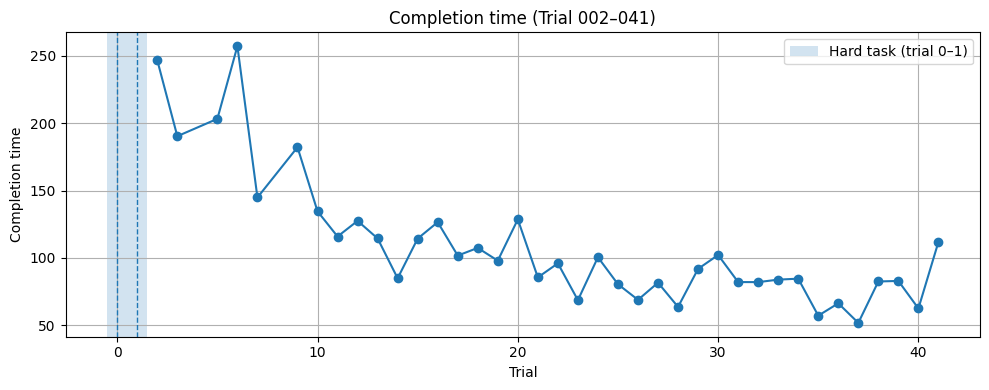

In [21]:
trial_metrics["trial"] = pd.to_numeric(trial_metrics["trial"], errors="coerce")
ts["start_time"] = pd.to_numeric(ts["start_time"], errors="coerce")
ts["end_time"]   = pd.to_numeric(ts["end_time"], errors="coerce")

# 2) compute completion time (seconds, if your ros_time is in seconds)
ts["completion_time"] = ts["end_time"] - ts["start_time"]

# 3) filter trials 002~041  -> 2~41
ts_2_41 = trial_metrics[(trial_metrics["trial"] >= 2) & (trial_metrics["trial"] <= 41)].copy()
ts_2_41 = ts_2_41.dropna(subset=["completion_time"]).sort_values("trial")

# optional: save
# ts_2_41.to_csv("completion_time_trial002_041.csv", index=False)

# 4) plot
fig, ax = plt.subplots(figsize=(10,4))

ax.axvspan(-0.5, 1.5, alpha=0.2, label="Hard task (trial 0–1)")

ax.plot(ts_2_41["trial"], ts_2_41["completion_time"], marker="o")
ax.set_xlabel("Trial")
ax.set_ylabel("Completion time")
ax.set_title("Completion time (Trial 002–041)")
ax.grid(True)
ax.axvline(0, linestyle="--", linewidth=1)
ax.axvline(1, linestyle="--", linewidth=1)
ax.legend()
plt.tight_layout()
plt.show()


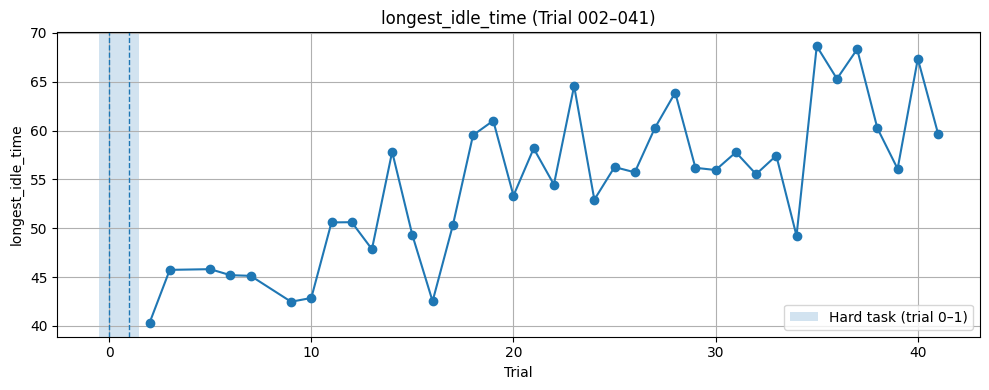

In [22]:
# Varialbe related to movement activation 
# print(trial_metrics[[
#     "trial", "completion_time", "activation_percent",
#     "longest_moving_time", "longest_moving_percent",
#     "longest_idle_time", "longest_idle_percent",
#     "n_samples", "note", "source_file"
# ]].to_string(index=False))

trial_metrics = pd.DataFrame(rows).sort_values("trial", na_position="last")
trial_metrics_2_41 = trial_metrics[(trial_metrics["trial"] >= 2) & (trial_metrics["trial"] <= 41)].copy()
trial_metrics_2_41 = trial_metrics_2_41.dropna(subset=["activation_percent"]).sort_values("trial")
fig, ax = plt.subplots(figsize=(10,4))

ax.axvspan(-0.5, 1.5, alpha=0.2, label="Hard task (trial 0–1)")

ax.plot(trial_metrics_2_41["trial"], trial_metrics_2_41["activation_percent"], marker="o")
ax.set_xlabel("Trial")
ax.set_ylabel("longest_idle_time")
ax.set_title("longest_idle_time (Trial 002–041)")
ax.grid(True)
ax.axvline(0, linestyle="--", linewidth=1)
ax.axvline(1, linestyle="--", linewidth=1)
ax.legend()
plt.tight_layout()
plt.show()


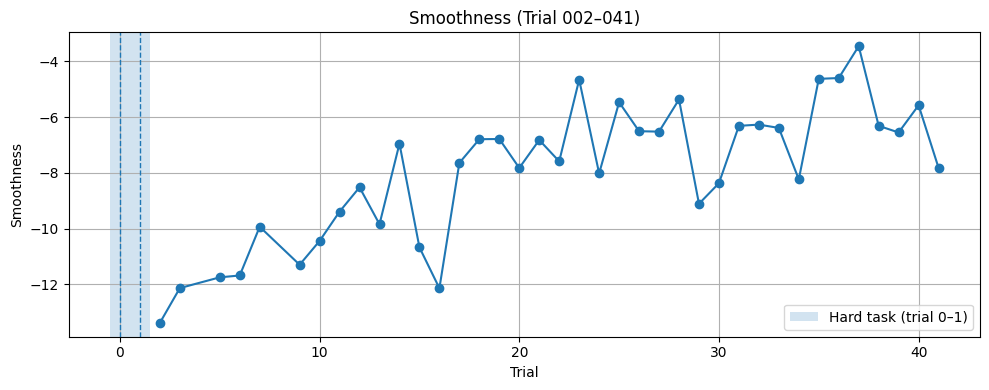

In [23]:
smooth_df["trial"] = pd.to_numeric(smooth_df["trial"], errors="coerce")


# 2) compute completion time (seconds, if your ros_time is in seconds)
# 3) filter trials 002~041  -> 2~41
smoothness = smooth_df[(smooth_df["trial"] >= 2) & (smooth_df["trial"] <= 41)].copy()
smoothness = smoothness.dropna(subset=["smoothness"]).sort_values("trial")

# optional: save
# ts_2_41.to_csv("completion_time_trial002_041.csv", index=False)

# 4) plot
fig, ax = plt.subplots(figsize=(10,4))

ax.axvspan(-0.5, 1.5, alpha=0.2, label="Hard task (trial 0–1)")

ax.plot(smoothness["trial"], smoothness["smoothness"], marker="o")
ax.set_xlabel("Trial")
ax.set_ylabel("Smoothness")
ax.set_title("Smoothness (Trial 002–041)")
ax.grid(True)
ax.axvline(0, linestyle="--", linewidth=1)
ax.axvline(1, linestyle="--", linewidth=1)
ax.legend()
plt.tight_layout()
plt.show()


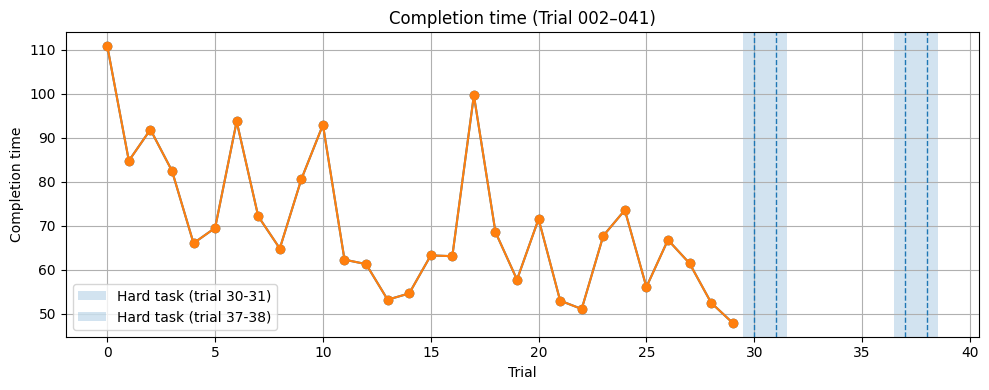

In [24]:
trial_metrics2["trial"] = pd.to_numeric(trial_metrics2["trial"], errors="coerce")
ts2["start_time"] = pd.to_numeric(ts2["start_time"], errors="coerce")
ts2["end_time"]   = pd.to_numeric(ts2["end_time"], errors="coerce")

# 2) compute completion time (seconds, if your ros_time is in seconds)
ts2["completion_time"] = ts2["end_time"] - ts2["start_time"]

# 3) filter trials 002~041  -> 2~41
ts2_2_41 = trial_metrics2[(trial_metrics2["trial"] >= 0) & (trial_metrics2["trial"] <= 29)].copy()
ts2_2_41 = ts2_2_41.dropna(subset=["completion_time"]).sort_values("trial")

# optional: save
# ts2_2_41.to_csv("completion_time_trial002_041.csv", index=False)
# 4) plot
fig, ax = plt.subplots(figsize=(10,4))

ax.axvspan(29.5, 31.5, alpha=0.2, label="Hard task (trial 30-31)")

ax.axvspan(36.5, 38.5, alpha=0.2, label="Hard task (trial 37-38)")

ax.plot(ts2_2_41["trial"], ts2_2_41["completion_time"], marker="o")
ax.set_xlabel("Trial")
ax.set_ylabel("Completion time")
ax.set_title("Completion time (Trial 002–041)")
ax.grid(True)
ax.axvline(30, linestyle="--", linewidth=1)
ax.axvline(31, linestyle="--", linewidth=1)
ax.axvline(37, linestyle="--", linewidth=1)
ax.axvline(38, linestyle="--", linewidth=1)

ax.legend()
plt.plot(ts2_2_41["trial"], ts2_2_41["completion_time"], marker="o")
plt.xlabel("Trial")
plt.ylabel("Completion time")
plt.title("Completion time (Trial 002–041)")
plt.grid(True)
plt.tight_layout()
plt.show()



No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


rows to plot: 30
unique trials: 30
missing trials: [30]
duplicates: Series([], Name: trial, dtype: int64)


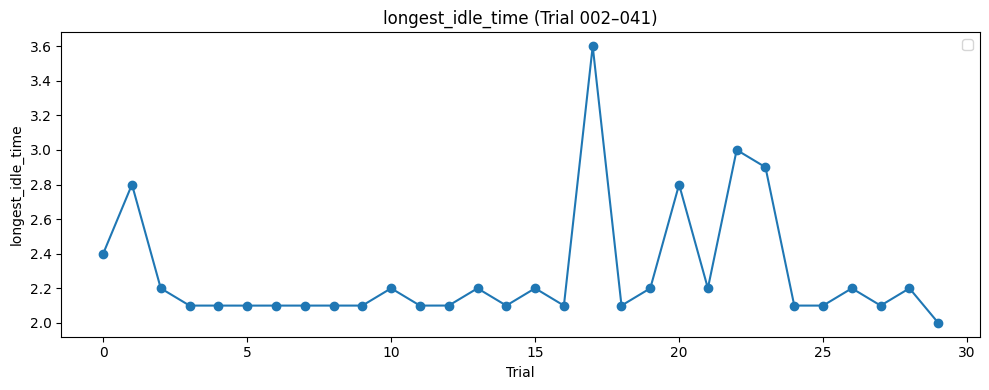

In [25]:
# Varialbe related to movement activation 
# print(trial_metrics[[
#     "trial", "completion_time", "activation_percent",
#     "longest_moving_time", "longest_moving_percent",
#     "longest_idle_time", "longest_idle_percent",
#     "n_samples", "note", "source_file"
# ]].to_string(index=False))

trial_metrics2 = pd.DataFrame(rows2).sort_values("trial", na_position="last")
trial_metrics2_2_41 = trial_metrics2[(trial_metrics2["trial"] >= 0) & (trial_metrics2["trial"] <= 29)].copy()
trial_metrics2_2_41 = trial_metrics2_2_41.dropna(subset=["longest_idle_time"]).sort_values("trial")
print("rows to plot:", len(trial_metrics2_2_41))
print("unique trials:", trial_metrics2_2_41["trial"].nunique())
print("missing trials:", sorted(set(range(0,31)) - set(trial_metrics2_2_41["trial"].astype(int))))
print("duplicates:", trial_metrics2_2_41["trial"].value_counts().loc[lambda s: s>1])

fig, ax = plt.subplots(figsize=(10,4))

# ax.axvspan(-0.5, 1.5, alpha=0.2, label="Hard task (trial 0–1)")

ax.plot(trial_metrics2_2_41["trial"], trial_metrics2_2_41["longest_idle_time"], marker="o")
ax.set_xlabel("Trial")
ax.set_ylabel("longest_idle_time")
ax.set_title("longest_idle_time (Trial 002–041)")
# ax.grid(True)
# ax.axvline(0, linestyle="--", linewidth=1)
# ax.axvline(1, linestyle="--", linewidth=1)
ax.legend()
plt.tight_layout()
plt.show()


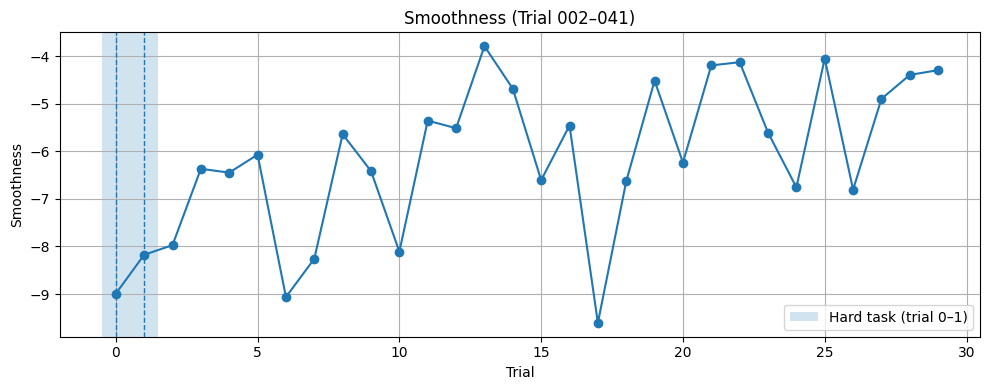

In [26]:
smooth_df2["trial"] = pd.to_numeric(smooth_df2["trial"], errors="coerce")


# 2) compute completion time (seconds, if your ros_time is in seconds)
# 3) filter trials 002~041  -> 2~41
smoothness2= smooth_df2[(smooth_df2["trial"] >= 0) & (smooth_df2["trial"] <= 29)].copy()
smoothness2 = smoothness2.dropna(subset=["smoothness"]).sort_values("trial")

# optional: save
# ts_2_41.to_csv("completion_time_trial002_041.csv", index=False)

# 4) plot
fig, ax = plt.subplots(figsize=(10,4))

ax.axvspan(-0.5, 1.5, alpha=0.2, label="Hard task (trial 0–1)")

ax.plot(smoothness2["trial"], smoothness2["smoothness"], marker="o")
ax.set_xlabel("Trial")
ax.set_ylabel("Smoothness")
ax.set_title("Smoothness (Trial 002–041)")
ax.grid(True)
ax.axvline(0, linestyle="--", linewidth=1)
ax.axvline(1, linestyle="--", linewidth=1)
ax.legend()
plt.tight_layout()
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


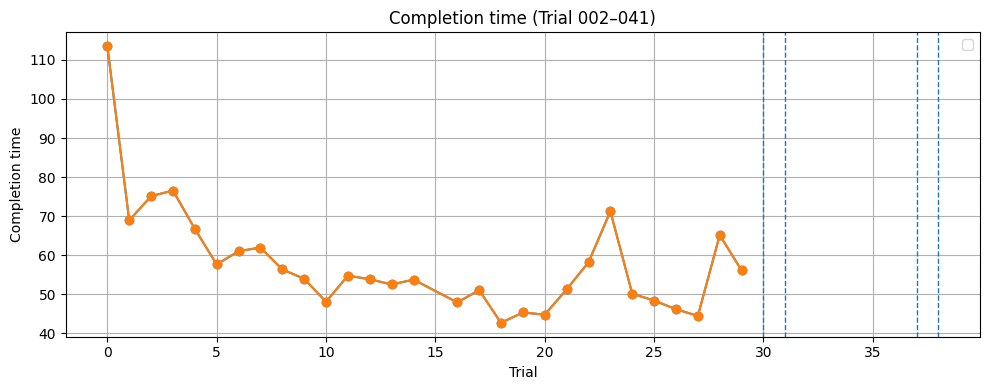

In [27]:
trial_metrics3["trial"] = pd.to_numeric(trial_metrics3["trial"], errors="coerce")
ts3["start_time"] = pd.to_numeric(ts3["start_time"], errors="coerce")
ts3["end_time"]   = pd.to_numeric(ts3["end_time"], errors="coerce")

# 2) compute completion time (seconds, if your ros_time is in seconds)
ts3["completion_time"] = ts3["end_time"] - ts3["start_time"]

# 3) filter trials 002~041  -> 2~41
ts3_2_41 = trial_metrics3[(trial_metrics3["trial"] >= 0) & (trial_metrics3["trial"] <= 29)].copy()
ts3_2_41 = ts3_2_41.dropna(subset=["completion_time"]).sort_values("trial")
# optional: save
# ts2_2_41.to_csv("completion_time_trial002_041.csv", index=False)
# 4) plot
fig, ax = plt.subplots(figsize=(10,4))

# ax.axvspan(29.5, 31.5, alpha=0.2, label="Hard task (trial 30-31)")

# ax.axvspan(36.5, 38.5, alpha=0.2, label="Hard task (trial 37-38)")

ax.plot(ts3_2_41["trial"], ts3_2_41["completion_time"], marker="o")
ax.set_xlabel("Trial")
ax.set_ylabel("Completion time")
ax.set_title("Completion time (Trial 002–041)")
ax.grid(True)
ax.axvline(30, linestyle="--", linewidth=1)
ax.axvline(31, linestyle="--", linewidth=1)
ax.axvline(37, linestyle="--", linewidth=1)
ax.axvline(38, linestyle="--", linewidth=1)

ax.legend()
plt.plot(ts3_2_41["trial"], ts3_2_41["completion_time"], marker="o")
plt.xlabel("Trial")
plt.ylabel("Completion time")
plt.title("Completion time (Trial 002–041)")
plt.grid(True)
plt.tight_layout()
plt.show()



No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


rows to plot: 29
unique trials: 29
missing trials: [15, 30]
duplicates: Series([], Name: trial, dtype: int64)


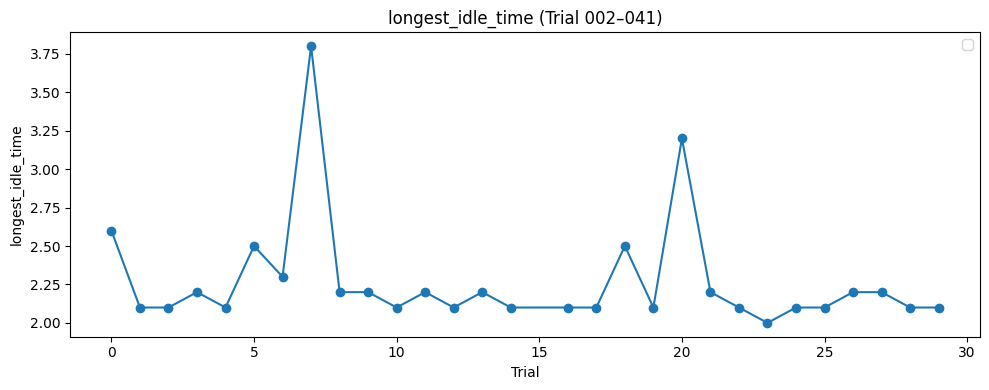

In [28]:
# Varialbe related to movement activation 
# print(trial_metrics[[
#     "trial", "completion_time", "activation_percent",
#     "longest_moving_time", "longest_moving_percent",
#     "longest_idle_time", "longest_idle_percent",
#     "n_samples", "note", "source_file"
# ]].to_string(index=False))

trial_metrics3 = pd.DataFrame(rows3).sort_values("trial", na_position="last")
trial_metrics3_2_41 = trial_metrics3[(trial_metrics3["trial"] >= 0) & (trial_metrics3["trial"] <= 29)].copy()
trial_metrics3_2_41 = trial_metrics3_2_41.dropna(subset=["longest_idle_time"]).sort_values("trial")
print("rows to plot:", len(trial_metrics3_2_41))
print("unique trials:", trial_metrics3_2_41["trial"].nunique())
print("missing trials:", sorted(set(range(0,31)) - set(trial_metrics3_2_41["trial"].astype(int))))
print("duplicates:", trial_metrics3_2_41["trial"].value_counts().loc[lambda s: s>1])

fig, ax = plt.subplots(figsize=(10,4))

# ax.axvspan(-0.5, 1.5, alpha=0.2, label="Hard task (trial 0–1)")

ax.plot(trial_metrics3_2_41["trial"], trial_metrics3_2_41["longest_idle_time"], marker="o")
ax.set_xlabel("Trial")
ax.set_ylabel("longest_idle_time")
ax.set_title("longest_idle_time (Trial 002–041)")
# ax.grid(True)
# ax.axvline(0, linestyle="--", linewidth=1)
# ax.axvline(1, linestyle="--", linewidth=1)
ax.legend()
plt.tight_layout()
plt.show()


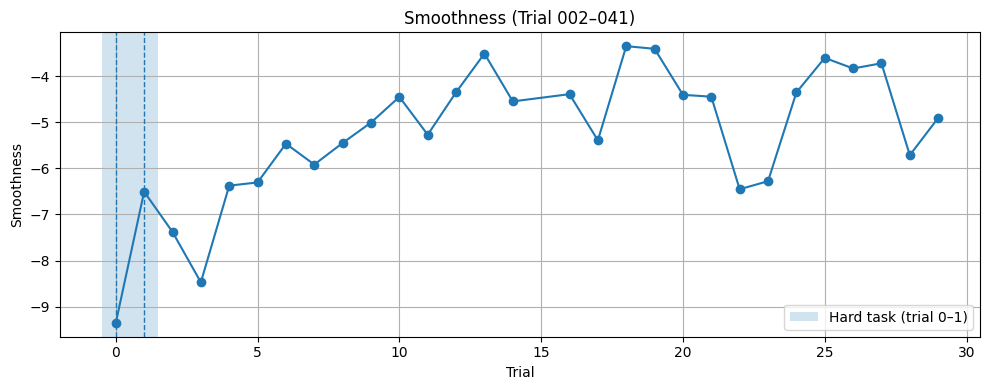

In [29]:
smooth_df3["trial"] = pd.to_numeric(smooth_df3["trial"], errors="coerce")

# 2) compute completion time (seconds, if your ros_time is in seconds)
# 3) filter trials 002~041  -> 2~41
smoothness3 = smooth_df3[(smooth_df3["trial"] >= 0) & (smooth_df3["trial"] <= 29)].copy()
smoothness3 = smoothness3.dropna(subset=["smoothness"]).sort_values("trial")

# optional: save
# ts_2_41.to_csv("completion_time_trial002_041.csv", index=False)

# 4) plot
fig, ax = plt.subplots(figsize=(10,4))

ax.axvspan(-0.5, 1.5, alpha=0.2, label="Hard task (trial 0–1)")

ax.plot(smoothness3["trial"], smoothness3["smoothness"], marker="o")
ax.set_xlabel("Trial")
ax.set_ylabel("Smoothness")
ax.set_title("Smoothness (Trial 002–041)")
ax.grid(True)
ax.axvline(0, linestyle="--", linewidth=1)
ax.axvline(1, linestyle="--", linewidth=1)
ax.legend()
plt.tight_layout()
plt.show()


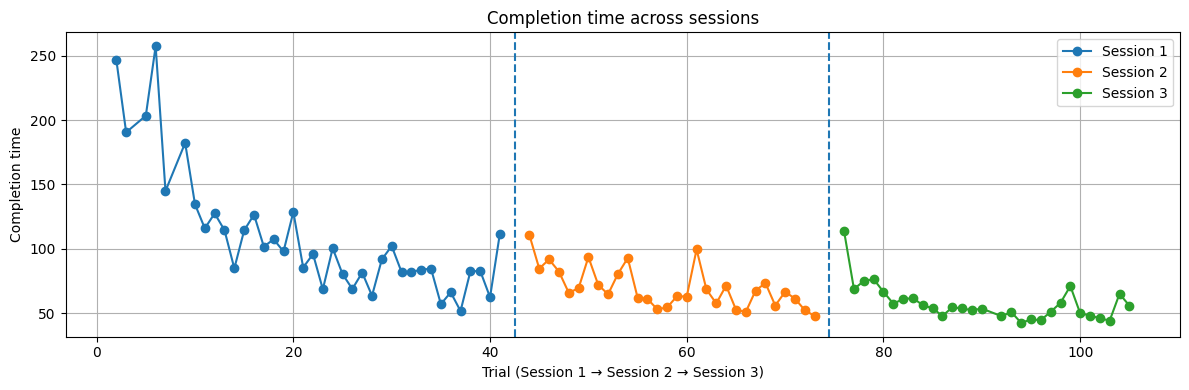

In [30]:
ts_2_41  = ts_2_41.sort_values("trial").copy()
ts2_2_41 = ts2_2_41.sort_values("trial").copy()

# 1) Build "global trial index" with a visible gap
gap = 3  # how many empty trial units you want between sessions

x1 = ts_2_41["trial"].to_numpy()
y1 = ts_2_41["completion_time"].to_numpy()

end1 = np.nanmax(x1)  # last trial number in session 1

x2 = ts2_2_41["trial"].to_numpy()
y2 = ts2_2_41["completion_time"].to_numpy()

  # last trial number in session 2

x3 = ts3_2_41["trial"].to_numpy()
y3 = ts3_2_41["completion_time"].to_numpy()

# shift session 2 to start after session 1 (+gap)
x2_shift = x2 + end1 + gap
end2 = np.nanmax(x2_shift)
x3_shift = x3 + end2 + gap
# 2) Plot
plt.figure(figsize=(12,4))
plt.plot(x1, y1, marker="o", label="Session 1")
plt.plot(x2_shift, y2, marker="o", label="Session 2")
plt.plot(x3_shift, y3, marker="o", label="Session 3")

# 3) Visual boundary marker + label
boundary_x = end1 + gap/2
plt.axvline(end1 + gap/2, linestyle="--")
plt.axvline(end2 + gap/2, linestyle="--")

# plt.text(end1 + gap/2, plt.ylim()[1], "Session boundary", va="top", ha="center")

plt.xlabel("Trial (Session 1 → Session 2 → Session 3)")
plt.ylabel("Completion time")
plt.title("Completion time across sessions")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


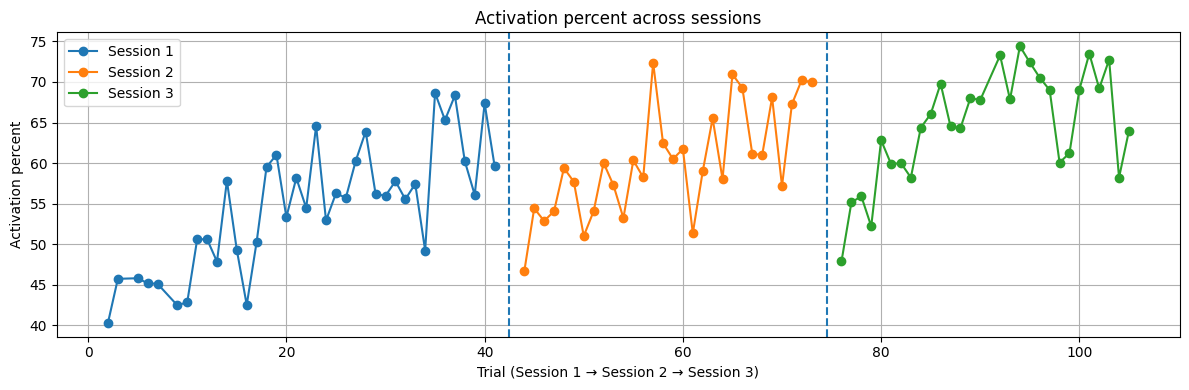

In [31]:
# Varialbe related to movement activation 
# print(trial_metrics[[
#     "trial", "completion_time", "activation_percent",
#     "longest_moving_time", "longest_moving_percent",
#     "longest_idle_time", "longest_idle_percent",
#     "n_samples", "note", "source_file"
# ]].to_string(index=False))

trial_metrics_2_41  = trial_metrics_2_41.sort_values("trial").copy()
trial_metrics2_2_41 = trial_metrics2_2_41.sort_values("trial").copy()
trial_metrics3_2_41  = trial_metrics3_2_41.sort_values("trial").copy()
# 1) Build "global trial index" with a visible gap
gap = 3  # how many empty trial units you want between sessions

x1 = trial_metrics_2_41["trial"].to_numpy() 
y1 = trial_metrics_2_41["activation_percent"].to_numpy()

end1 = np.nanmax(x1)  # last trial number in session 1

x2 = trial_metrics2_2_41["trial"].to_numpy()
y2 = trial_metrics2_2_41["activation_percent"].to_numpy()

# shift session 2 to start after session 1 (+gap)
x2_shift = x2 + end1 + gap

x3 = trial_metrics3_2_41["trial"].to_numpy()
y3 = trial_metrics3_2_41["activation_percent"].to_numpy()

end2 = np.nanmax(x2_shift)
x3_shift = x3 + end2 + gap

# 2) Plot
plt.figure(figsize=(12,4))
plt.plot(x1, y1, marker="o", label="Session 1")
plt.plot(x2_shift, y2, marker="o", label="Session 2")
plt.plot(x3_shift, y3, marker="o", label="Session 3")

# 3) Visual boundary marker + label
boundary_x = end1 + gap/2
plt.axvline(end1 + gap/2, linestyle="--")
plt.axvline(end2 + gap/2, linestyle="--")
plt.xlabel("Trial (Session 1 → Session 2 → Session 3)")
plt.ylabel("Activation percent")   
plt.title("Activation percent across sessions")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


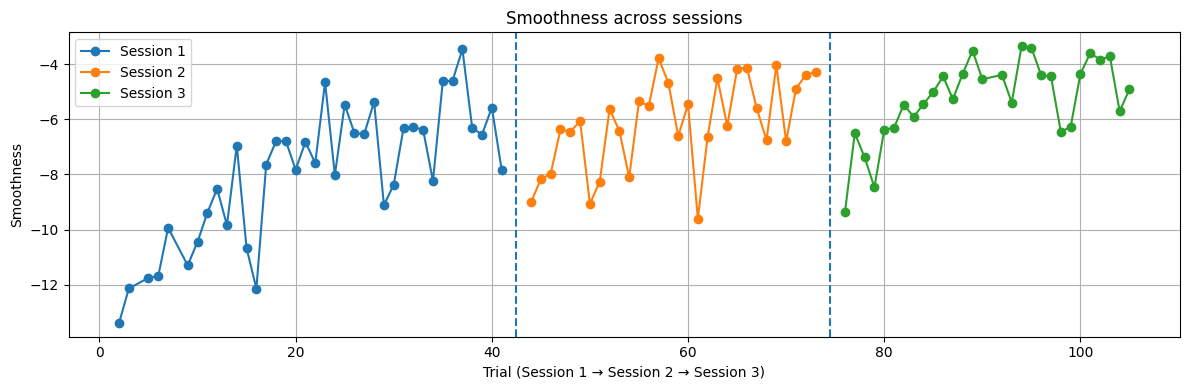

In [32]:
# Varialbe related to movement activation 
# print(trial_metrics[[
#     "trial", "completion_time", "activation_percent",
#     "longest_moving_time", "longest_moving_percent",
#     "longest_idle_time", "longest_idle_percent",
#     "n_samples", "note", "source_file"
# ]].to_string(index=False))

smoothness  = smoothness.sort_values("trial").copy()
smoothness2 = smoothness2.sort_values("trial").copy()
smoothness3 = smoothness3.sort_values("trial").copy()
# 1) Build "global trial index" with a visible gap
gap = 3  # how many empty trial units you want between sessions

x1 = smoothness["trial"].to_numpy() 
y1 = smoothness["smoothness"].to_numpy()

end1 = np.nanmax(x1)  # last trial number in session 1

x2 = smoothness2["trial"].to_numpy()
y2 = smoothness2["smoothness"].to_numpy()

# shift session 2 to start after session 1 (+gap)
x2_shift = x2 + end1 + gap

x3 = smoothness3["trial"].to_numpy()
y3 = smoothness3["smoothness"].to_numpy()

end2 = np.nanmax(x2_shift)
x3_shift = x3 + end2 + gap

# 2) Plot
plt.figure(figsize=(12,4))
plt.plot(x1, y1, marker="o", label="Session 1")
plt.plot(x2_shift, y2, marker="o", label="Session 2")
plt.plot(x3_shift, y3, marker="o", label="Session 3")

# 3) Visual boundary marker + label
boundary_x = end1 + gap/2
plt.axvline(end1 + gap/2, linestyle="--")
plt.axvline(end2 + gap/2, linestyle="--")
plt.xlabel("Trial (Session 1 → Session 2 → Session 3)")
plt.ylabel("Smoothness")   
plt.title("Smoothness across sessions")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
